In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('customer_shopping_data.csv')

In [3]:
df.head(2)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul


In [ ]:
df.isnull().sum()

In [9]:
df[df['category'].str.contains('Souvenir')]

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
67,I204979,C173084,Female,24,Souvenir,5,58.65,Debit Card,14/03/2021,Istinye Park
75,I870944,C169749,Male,41,Souvenir,3,35.19,Credit Card,8/6/2021,Cevahir AVM
82,I151332,C168491,Male,30,Souvenir,2,23.46,Cash,25/03/2021,Kanyon
92,I317105,C177975,Female,30,Souvenir,5,58.65,Debit Card,29/07/2021,Kanyon
114,I317140,C326893,Female,56,Souvenir,5,58.65,Cash,19/10/2022,Istinye Park
...,...,...,...,...,...,...,...,...,...,...
99272,I184770,C313382,Female,32,Souvenir,2,23.46,Cash,22/11/2021,Metrocity
99276,I303026,C128555,Female,52,Souvenir,3,35.19,Credit Card,6/5/2021,Emaar Square Mall
99329,I381614,C211364,Female,27,Souvenir,3,35.19,Credit Card,28/08/2022,Kanyon
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon


In [19]:
df.rename(columns = {'Total':'Total Price'},inplace = True)

In [21]:
df['Unit Price'] = df['Total Price']/df['quantity']

In [29]:
df.head(2)

,invoice_no,customer_id,gender,age,category,quantity,Total Price,payment_method,invoice_date,shopping_mall,Unit Price
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,300.08
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,600.17


In [28]:
df.sort_values(by = 'Unit Price').head(2)

,invoice_no,customer_id,gender,age,category,quantity,Total Price,payment_method,invoice_date,shopping_mall,Unit Price
49728,I116181,C224076,Female,41,Food & Beverage,5,26.15,Cash,6/2/2023,Metrocity,5.23
56111,I305660,C658114,Male,38,Food & Beverage,5,26.15,Cash,14/07/2021,Mall of Istanbul,5.23


In [47]:
#unique customers
df['customer_id'].value_counts().reset_index().sort_values(by = 'customer_id' , ascending = False).head(2)

,customer_id,count
38371,C999995,1
76632,C999976,1


In [51]:
df[['Total Price' ,'quantity']].describe()

,Total Price,quantity
count,99457.000000,99457.000000
mean,689.256321,3.003429
std,941.184567,1.413025
min,5.230000,1.000000
25%,45.450000,2.000000
50%,203.300000,3.000000
75%,1200.320000,4.000000
max,5250.000000,5.000000


In [53]:
df.dtypes

invoice_no         object
customer_id        object
gender             object
age                 int64
category           object
quantity            int64
Total Price       float64
payment_method     object
invoice_date       object
shopping_mall      object
Unit Price        float64
dtype: object

# Exploratory Data Analysis

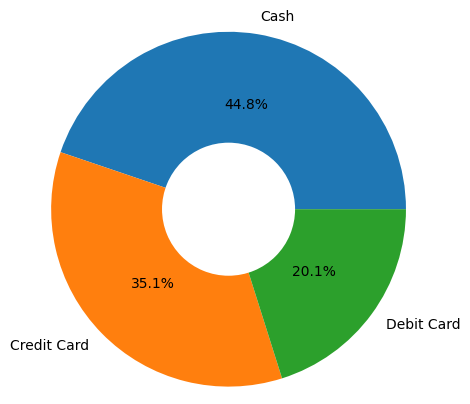

In [65]:
pm=df.groupby(['payment_method'],as_index = False)['Total Price'].sum().sort_values(by = ['payment_method'])
plt.pie(pm['Total Price'] ,labels = pm['payment_method'] ,autopct = '%0.01f%%',radius = 1.2)
plt.pie([1],radius = .45 ,colors = 'w')
plt.show()

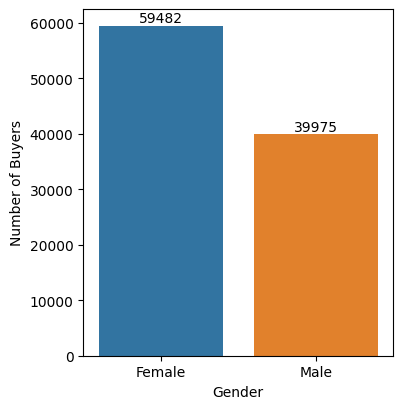

In [77]:
plt.figure(figsize = (4,4.5))
ax= sns.countplot(x = df['gender'])
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlabel('Gender')
plt.ylabel('Number of Buyers')
plt.show()

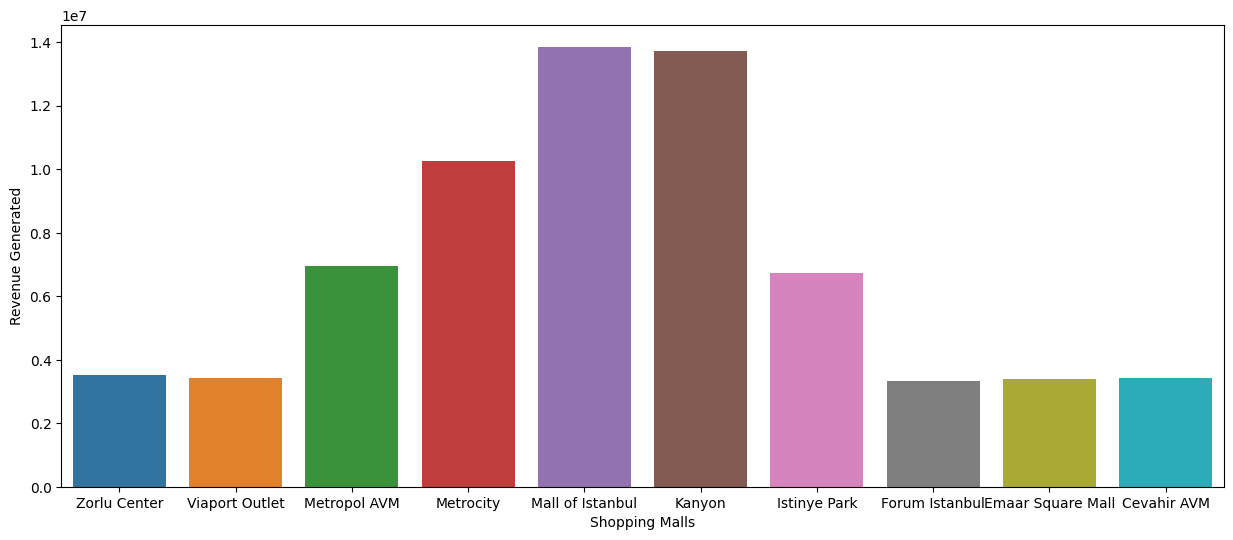

In [98]:
plt.figure(figsize= (15,6))
pm=df.groupby(['shopping_mall'],as_index = False)['Total Price'].sum().sort_values(by = ['shopping_mall'],ascending = False)
sns.barplot(x= 'shopping_mall',y='Total Price',data = pm)
plt.xlabel('Shopping Malls')
plt.ylabel('Revenue Generated')
plt.show()

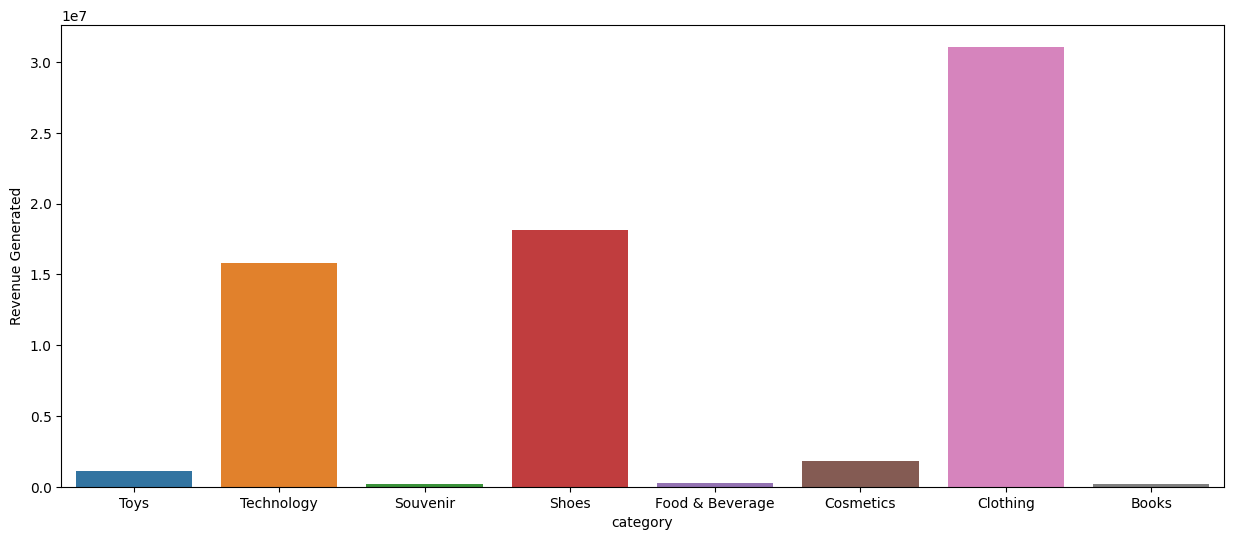

In [106]:
plt.figure(figsize= (15,6))
pm=df.groupby(['category'],as_index = False)['Total Price'].sum().sort_values(by = ['category'],ascending = False)
sns.barplot(x= 'category',y='Total Price',data = pm)
plt.xlabel('category')
plt.ylabel('Revenue Generated')
plt.show()

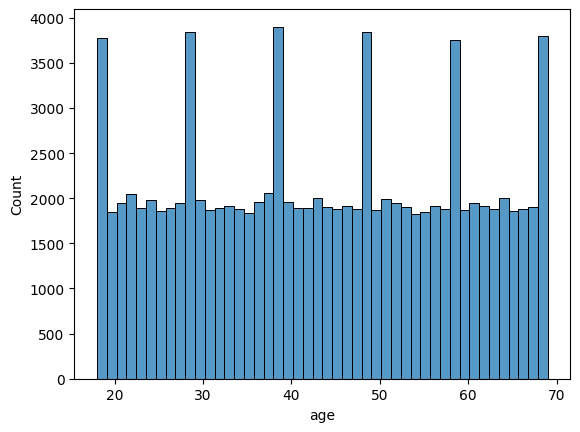

In [126]:
sns.histplot(df['age'])
plt.show()

**Conclusion:**

*1.Orders are bought using 'Credit Card' and 'Cash'.*

*2.Mostly Buyers are Females.*

*3.'Mall Of Istanbul ,Kanyon , Metrocity' (Malls) have highest sales.*

*4.Most selling Categories are 'Clothing' , 'Shoes'  and 'Technology'.*

*5.Buyers are belongs to Age-Group '19-69' .*